In [149]:
# EDA
import pandas as pd
import statsmodels.api as sm
import plotly.express as px
import plotly.figure_factory as ff
import matplotlib.pyplot as plt
import sweetviz as sv

# ML
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, recall_score

# Otimização de hiperparâmetros
import optuna

In [150]:
# Carregar Dataset
df_obesidade = pd.read_csv('./datasets/dataset_obsesidade.csv')


In [151]:
# Alterando nome da coluna Obase para Obesidade
df_obesidade.rename(columns={'Obeso': 'Obesidade'}, inplace=True)

In [152]:
# Mostrar primeiros registros do Dataframe
df_obesidade.head(5)

,Genero_Masculino,Idade,Historico_Familiar_Sobrepeso,Consumo_Alta_Caloria_Com_Frequencia,Consumo_Vegetais_Com_Frequencia,Refeicoes_Dia,Consumo_Alimentos_entre_Refeicoes,Fumante,Consumo_Agua,Monitora_Calorias_Ingeridas,Nivel_Atividade_Fisica,Nivel_Uso_Tela,Consumo_Alcool,Transporte_Automovel,Transporte_Bicicleta,Transporte_Motocicleta,Transporte_Publico,Transporte_Caminhada,Obesidade
0,0,21.0,1,0,2.0,3.0,1,0,2.0,0,0.0,1.0,0,0,0,0,1,0,0
1,0,21.0,1,0,3.0,3.0,1,1,3.0,1,3.0,0.0,1,0,0,0,1,0,0
2,1,23.0,1,0,2.0,3.0,1,0,2.0,0,2.0,1.0,2,0,0,0,1,0,0
3,1,27.0,0,0,3.0,3.0,1,0,2.0,0,2.0,0.0,2,0,0,0,0,1,0
4,1,22.0,0,0,2.0,1.0,1,0,2.0,0,0.0,0.0,1,0,0,0,1,0,0


In [153]:
# Mostrar ultimos registros do Dataframe
df_obesidade.tail(5)

,Genero_Masculino,Idade,Historico_Familiar_Sobrepeso,Consumo_Alta_Caloria_Com_Frequencia,Consumo_Vegetais_Com_Frequencia,Refeicoes_Dia,Consumo_Alimentos_entre_Refeicoes,Fumante,Consumo_Agua,Monitora_Calorias_Ingeridas,Nivel_Atividade_Fisica,Nivel_Uso_Tela,Consumo_Alcool,Transporte_Automovel,Transporte_Bicicleta,Transporte_Motocicleta,Transporte_Publico,Transporte_Caminhada,Obesidade
2106,0,20.976842,1,1,3.0,3.0,1,0,1.728139,0,1.676269,0.906247,1,0,0,0,1,0,1
2107,0,21.982942,1,1,3.0,3.0,1,0,2.005130,0,1.341390,0.599270,1,0,0,0,1,0,1
2108,0,22.524036,1,1,3.0,3.0,1,0,2.054193,0,1.414209,0.646288,1,0,0,0,1,0,1
2109,0,24.361936,1,1,3.0,3.0,1,0,2.852339,0,1.139107,0.586035,1,0,0,0,1,0,1
2110,0,23.664709,1,1,3.0,3.0,1,0,2.863513,0,1.026452,0.714137,1,0,0,0,1,0,1


In [154]:
# Mostrar estrutura / schema do Dataframe
df_obesidade.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Genero_Masculino                     2111 non-null   int64  
 1   Idade                                2111 non-null   float64
 2   Historico_Familiar_Sobrepeso         2111 non-null   int64  
 3   Consumo_Alta_Caloria_Com_Frequencia  2111 non-null   int64  
 4   Consumo_Vegetais_Com_Frequencia      2111 non-null   float64
 5   Refeicoes_Dia                        2111 non-null   float64
 6   Consumo_Alimentos_entre_Refeicoes    2111 non-null   int64  
 7   Fumante                              2111 non-null   int64  
 8   Consumo_Agua                         2111 non-null   float64
 9   Monitora_Calorias_Ingeridas          2111 non-null   int64  
 10  Nivel_Atividade_Fisica               2111 non-null   float64
 11  Nivel_Uso_Tela                

In [155]:
# Converter coluna para tipo inteiro
lista_colunas = ['Idade', 'Consumo_Vegetais_Com_Frequencia', 'Refeicoes_Dia', 'Consumo_Agua', 'Nivel_Atividade_Fisica', 'Nivel_Uso_Tela']
df_obesidade[lista_colunas] = df_obesidade[lista_colunas].astype('int64')
df_obesidade.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype
---  ------                               --------------  -----
 0   Genero_Masculino                     2111 non-null   int64
 1   Idade                                2111 non-null   int64
 2   Historico_Familiar_Sobrepeso         2111 non-null   int64
 3   Consumo_Alta_Caloria_Com_Frequencia  2111 non-null   int64
 4   Consumo_Vegetais_Com_Frequencia      2111 non-null   int64
 5   Refeicoes_Dia                        2111 non-null   int64
 6   Consumo_Alimentos_entre_Refeicoes    2111 non-null   int64
 7   Fumante                              2111 non-null   int64
 8   Consumo_Agua                         2111 non-null   int64
 9   Monitora_Calorias_Ingeridas          2111 non-null   int64
 10  Nivel_Atividade_Fisica               2111 non-null   int64
 11  Nivel_Uso_Tela                       2111 non-null   int

In [156]:
# Detectar valores ausentes
df_obesidade.isnull().sum()

Genero_Masculino                       0
Idade                                  0
Historico_Familiar_Sobrepeso           0
Consumo_Alta_Caloria_Com_Frequencia    0
Consumo_Vegetais_Com_Frequencia        0
Refeicoes_Dia                          0
Consumo_Alimentos_entre_Refeicoes      0
Fumante                                0
Consumo_Agua                           0
Monitora_Calorias_Ingeridas            0
Nivel_Atividade_Fisica                 0
Nivel_Uso_Tela                         0
Consumo_Alcool                         0
Transporte_Automovel                   0
Transporte_Bicicleta                   0
Transporte_Motocicleta                 0
Transporte_Publico                     0
Transporte_Caminhada                   0
Obesidade                              0
dtype: int64

# EDA

In [157]:
# Distribuição da Variável Target - Obesidade
px.bar(df_obesidade.value_counts('Obesidade'))

In [158]:
# Distribuição da Variável Target - Obesidade em porcentagem
px.bar(df_obesidade.value_counts('Obesidade') / len(df_obesidade) * 100)

In [159]:
# Análise Univariada
px.histogram(df_obesidade, x='Idade')

In [160]:
# Análise univariada - Idade Boxplot
px.box(df_obesidade, y='Idade')

In [161]:
# Análise Univariada - Genero
px.bar(df_obesidade.value_counts('Genero_Masculino') / len(df_obesidade) * 100)

In [162]:
# Análise Univariada - Histórico Obesidade na Familia
px.bar(df_obesidade.value_counts('Historico_Familiar_Sobrepeso') / len(df_obesidade) * 100)

In [163]:
# Análise Univariada - Nível de Atividade Física
px.bar(df_obesidade.value_counts('Nivel_Atividade_Fisica') / len(df_obesidade) * 100)

In [164]:
# ANÁLISE UNIVARIADA - NÍVEL DE USO DE TELAS
px.bar(df_obesidade.value_counts('Nivel_Uso_Tela') / len(df_obesidade) * 100)

In [165]:
# Formulação de Hipóteses
# Faixa Etária influencia na Obesidade?
df_obesidade['Idade'].describe()

count    2111.000000
mean       23.972525
std         6.308664
min        14.000000
25%        19.000000
50%        22.000000
75%        26.000000
max        61.000000
Name: Idade, dtype: float64

In [166]:
# Bucketing de Idade
bins = [10, 20, 30, 40, 50, 60, 70]
bins_ordinal = [0, 1, 2, 3, 4, 5]
labels_faixa_etaria = ['10-20', '20-30', '30-40', '40-50', '50-60', '60-70']
df_obesidade['Faixa_Etaria_String'] = pd.cut(df_obesidade['Idade'], bins=bins, labels=labels_faixa_etaria, include_lowest=True)
df_obesidade['Faixa_Etaria'] = pd.cut(df_obesidade['Idade'], bins=bins, labels=bins_ordinal, include_lowest=True)


In [167]:
df_obesidade

,Genero_Masculino,Idade,Historico_Familiar_Sobrepeso,Consumo_Alta_Caloria_Com_Frequencia,Consumo_Vegetais_Com_Frequencia,Refeicoes_Dia,Consumo_Alimentos_entre_Refeicoes,Fumante,Consumo_Agua,Monitora_Calorias_Ingeridas,...,Nivel_Uso_Tela,Consumo_Alcool,Transporte_Automovel,Transporte_Bicicleta,Transporte_Motocicleta,Transporte_Publico,Transporte_Caminhada,Obesidade,Faixa_Etaria_String,Faixa_Etaria
0,0,21,1,0,2,3,1,0,2,0,...,1,0,0,0,0,1,0,0,20-30,1
1,0,21,1,0,3,3,1,1,3,1,...,0,1,0,0,0,1,0,0,20-30,1
2,1,23,1,0,2,3,1,0,2,0,...,1,2,0,0,0,1,0,0,20-30,1
3,1,27,0,0,3,3,1,0,2,0,...,0,2,0,0,0,0,1,0,20-30,1
4,1,22,0,0,2,1,1,0,2,0,...,0,1,0,0,0,1,0,0,20-30,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20,1,1,3,3,1,0,1,0,...,0,1,0,0,0,1,0,1,10-20,0
2107,0,21,1,1,3,3,1,0,2,0,...,0,1,0,0,0,1,0,1,20-30,1
2108,0,22,1,1,3,3,1,0,2,0,...,0,1,0,0,0,1,0,1,20-30,1
2109,0,24,1,1,3,3,1,0,2,0,...,0,1,0,0,0,1,0,1,20-30,1


In [168]:
# Criar uma tabela de Contingência - Faixa Etária e Obesidade
tabela_contingencia_faixa_etaria = sm.stats.Table.from_data(df_obesidade[['Obesidade', 'Faixa_Etaria_String']])
tabela_contingencia_faixa_etaria.table_orig

Faixa_Etaria_String,10-20,20-30,30-40,40-50,50-60,60-70
Obesidade,,,,,,
0,498,489,131,13,7,1
1,176,649,127,19,1,0


In [169]:
# Teste de Chi-squared de Pearson
print(tabela_contingencia_faixa_etaria.test_nominal_association())

df          5
pvalue      0.0
statistic   170.1116865347508


p_value < 0.05, rejeitamos H0, portanto as variáveis não são independentes

# A parte de EDA Está com erro de dependencia estarei pulando até obter as dependencias corretas e reconfigurar o projeto

In [170]:
# Automatizar EDA usando Sweetviz
sv_obesidade_report = sv.analyze(df_obesidade)

                                             |          | [  0%]   00:00 -> (? left)


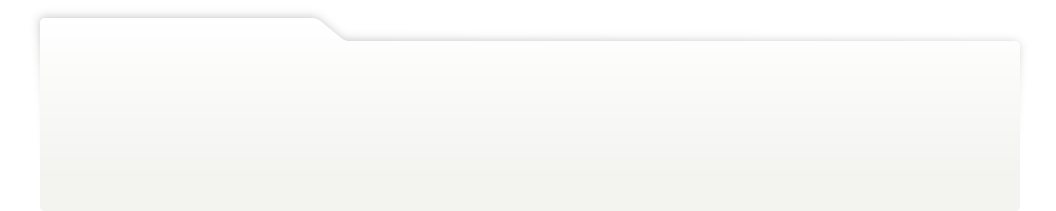
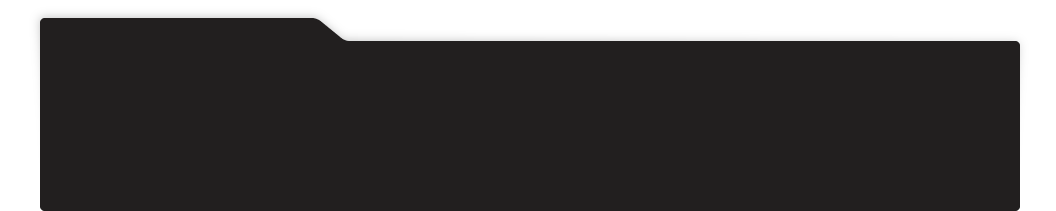
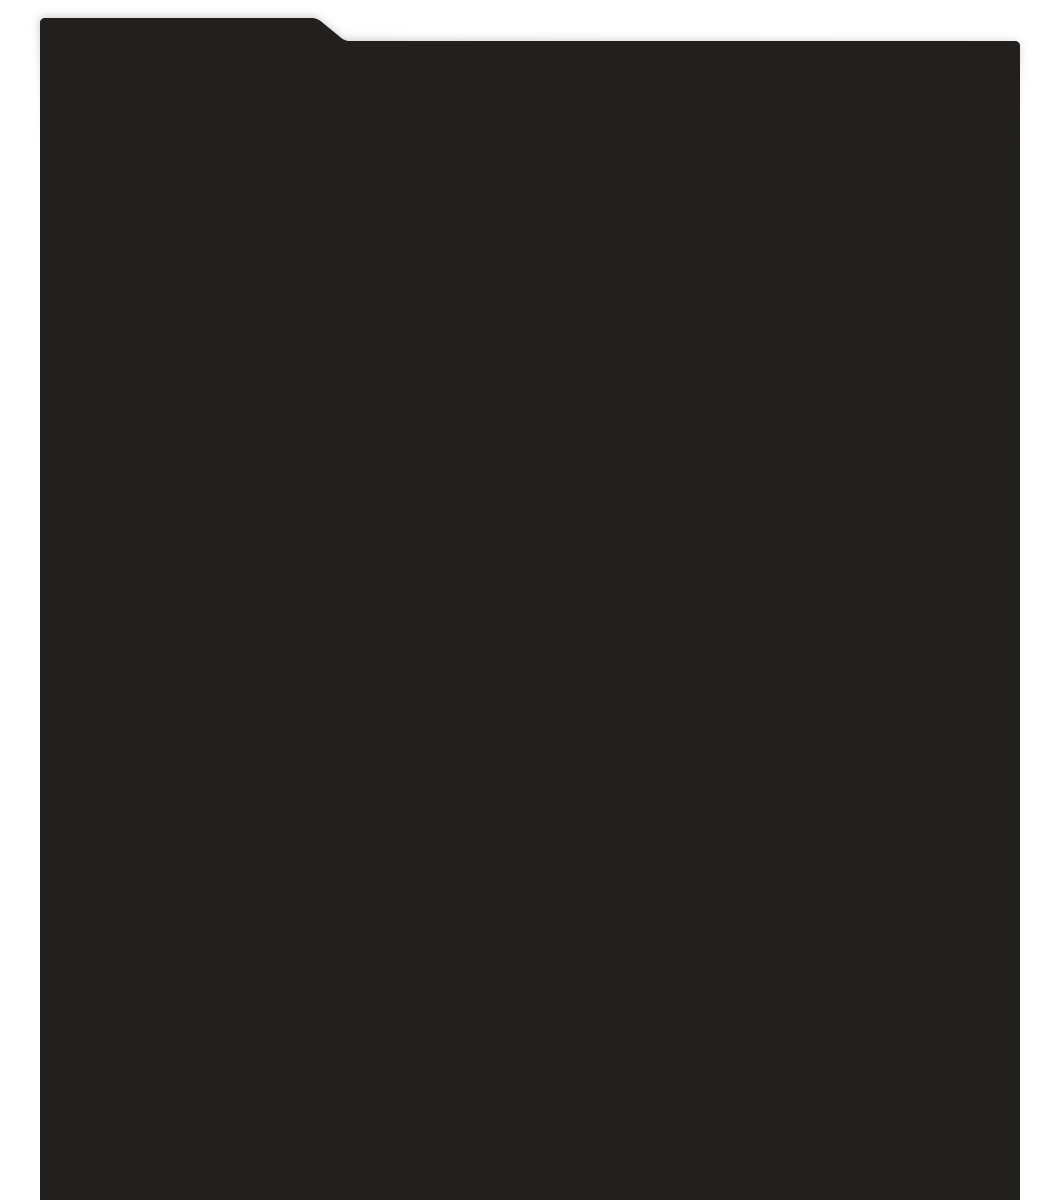
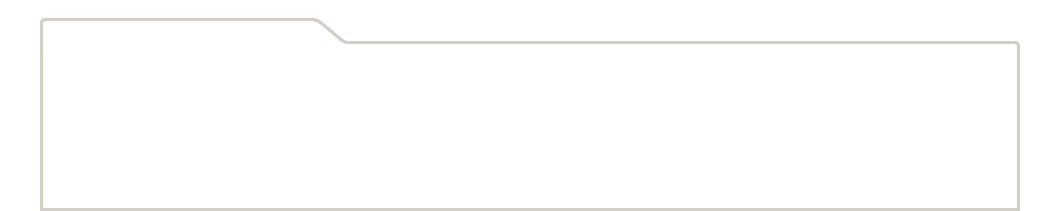
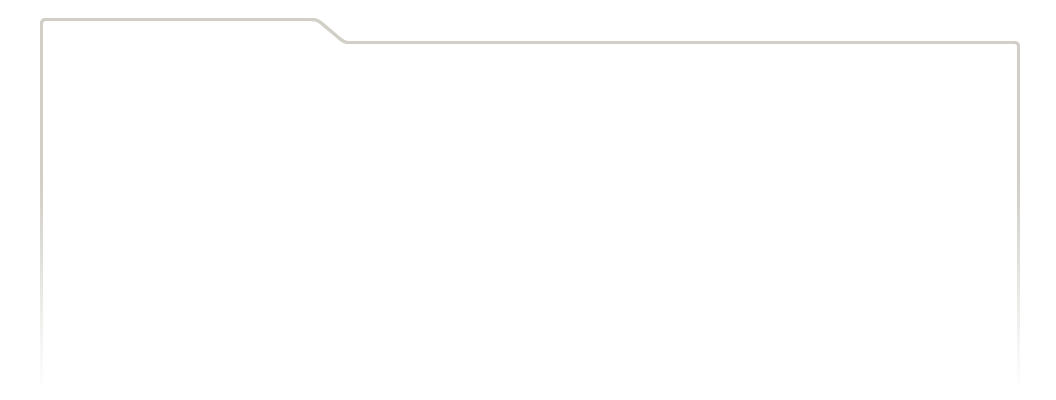
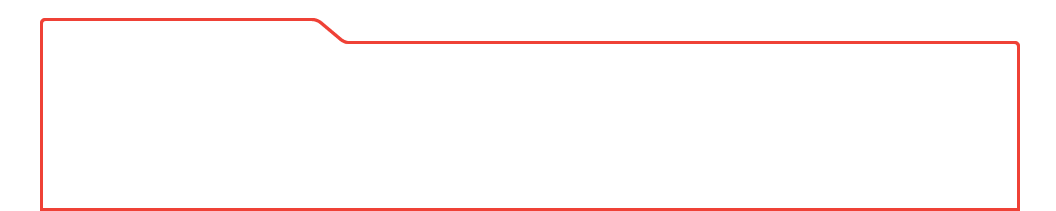
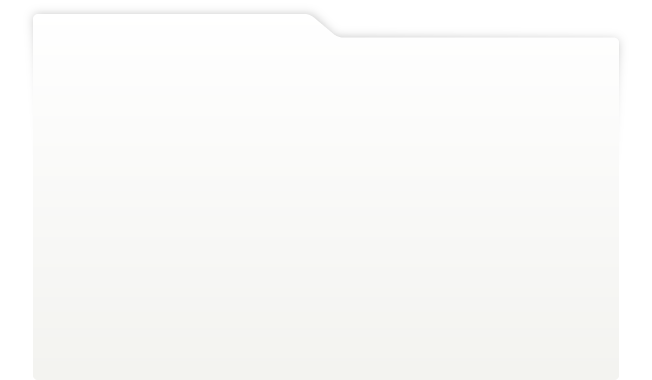
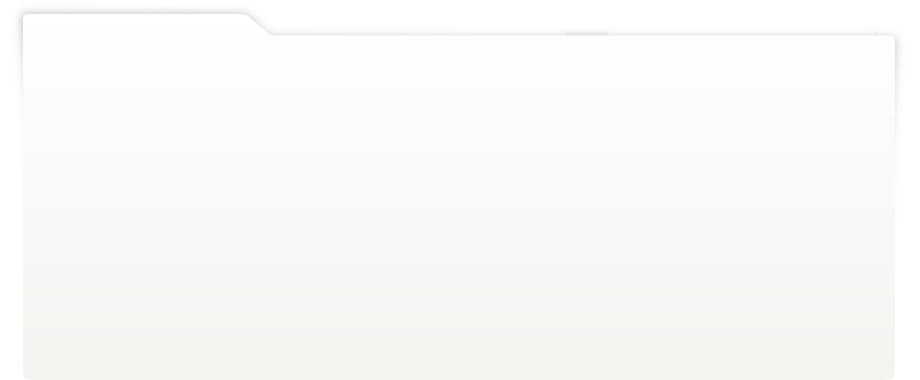
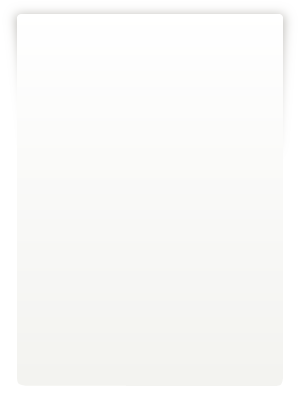
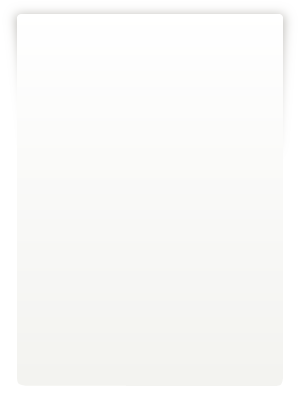
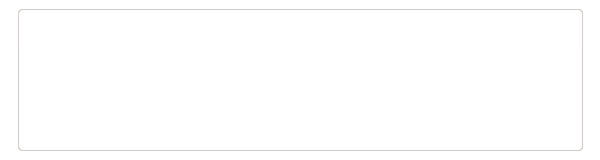
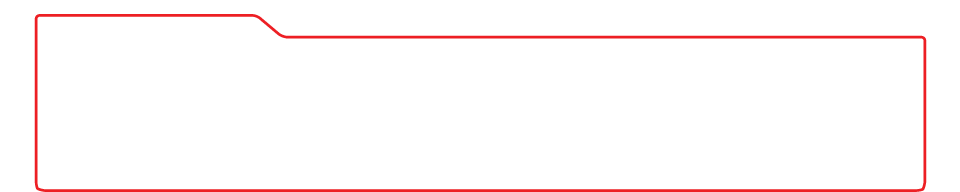
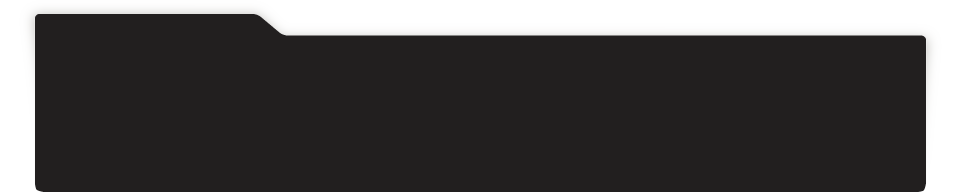
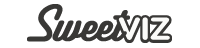
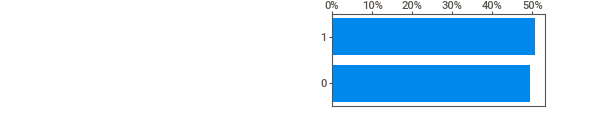
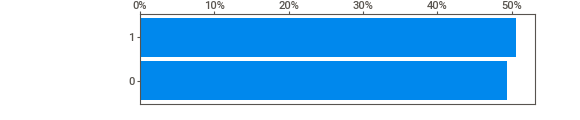
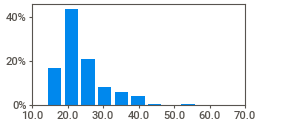
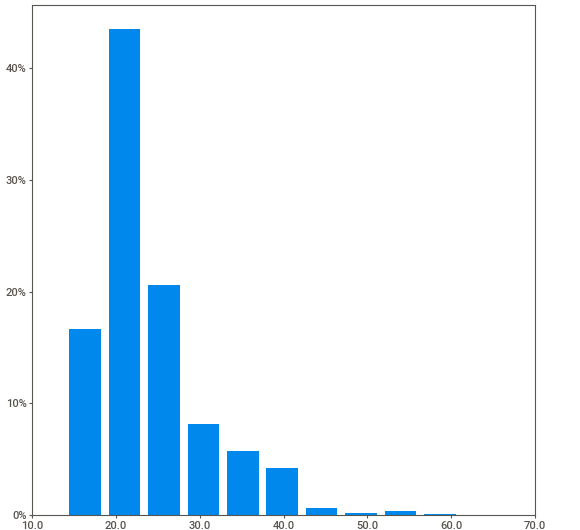
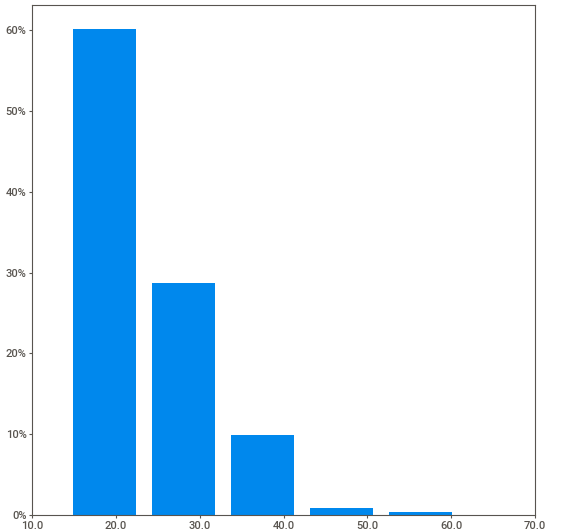
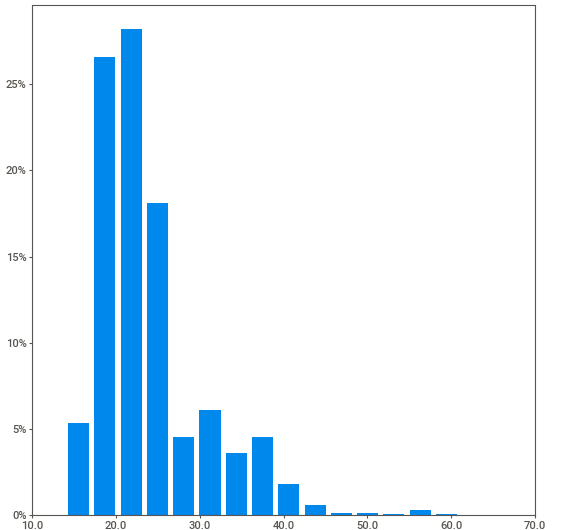
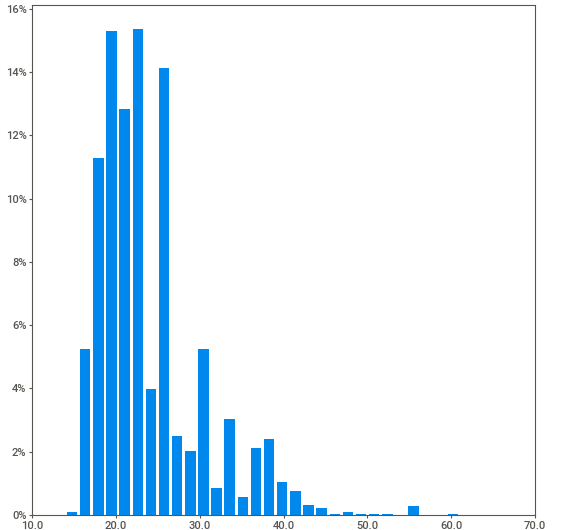
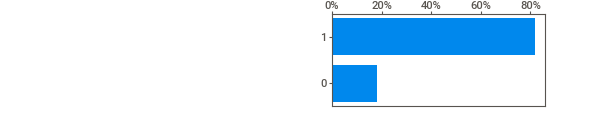
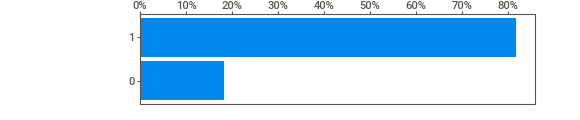
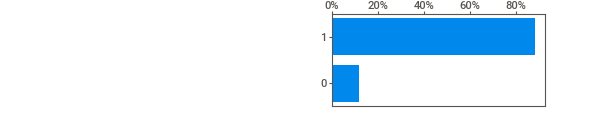
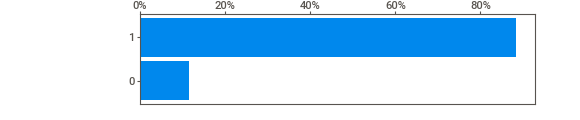
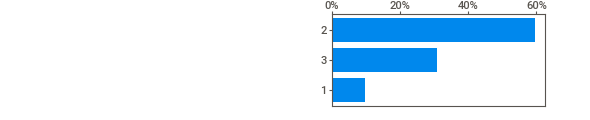
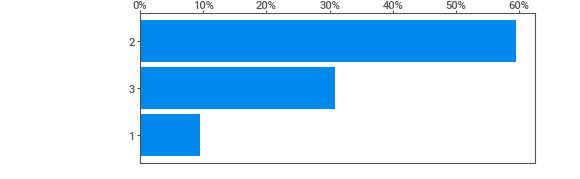
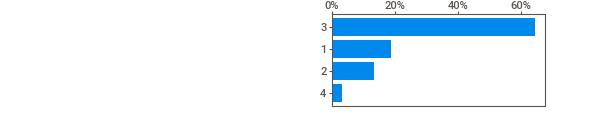
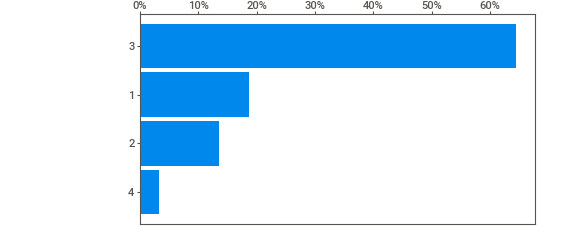
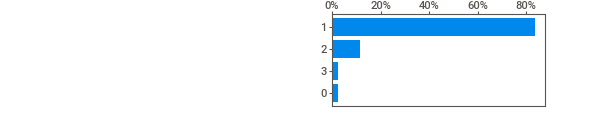
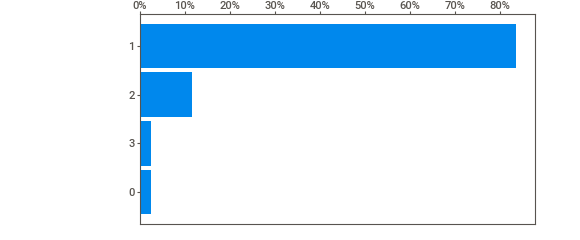
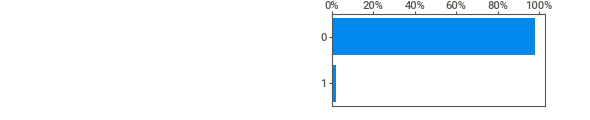
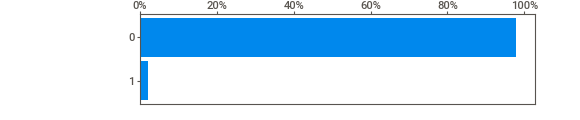
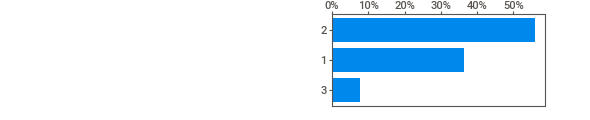
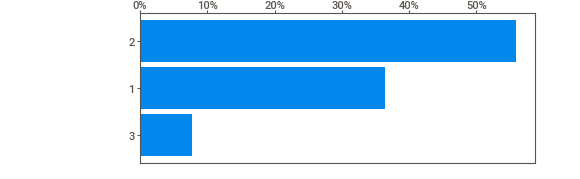
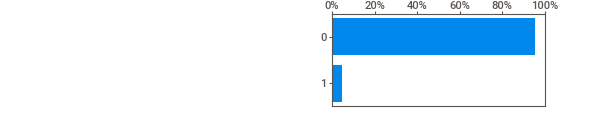
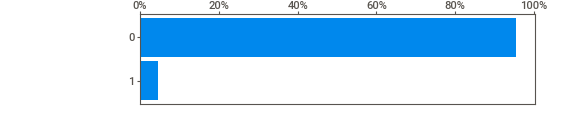
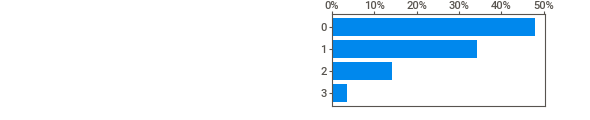
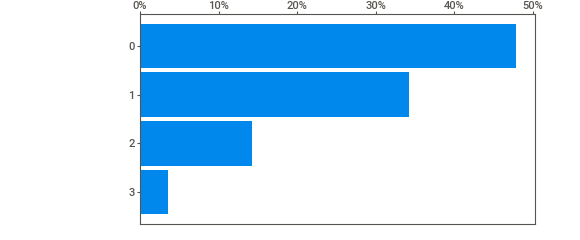
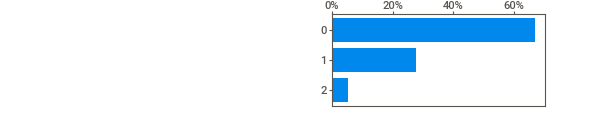
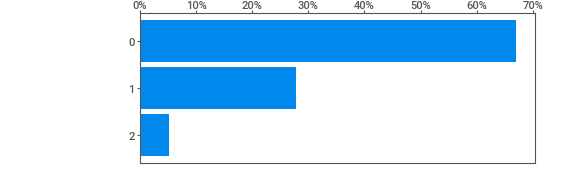
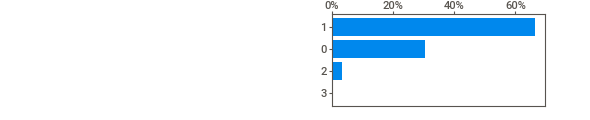
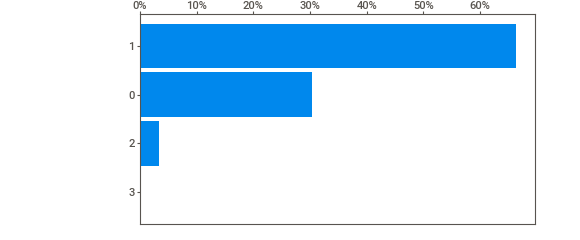
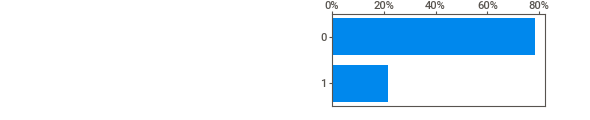
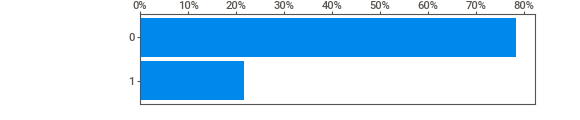
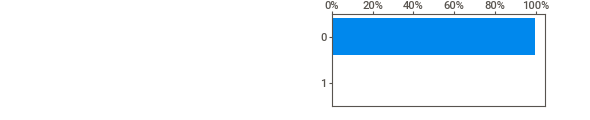
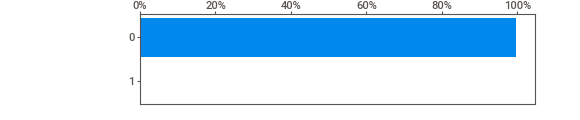
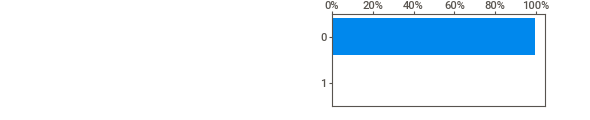
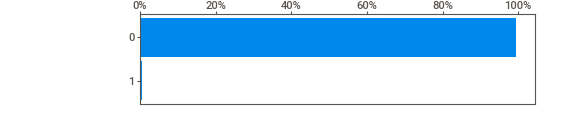
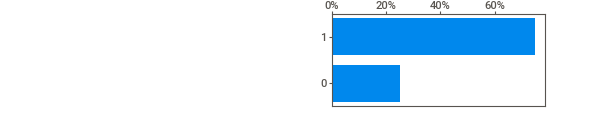
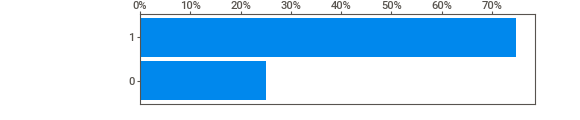
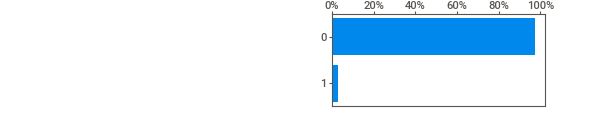
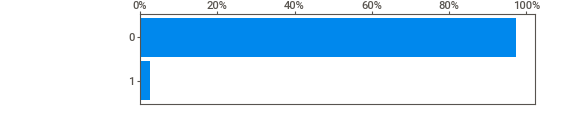
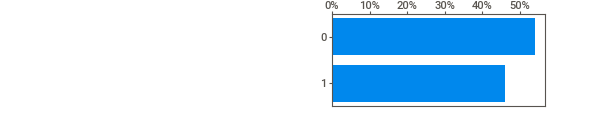
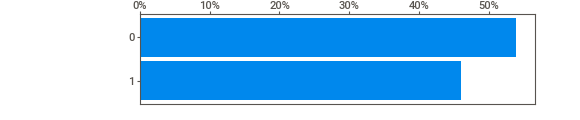
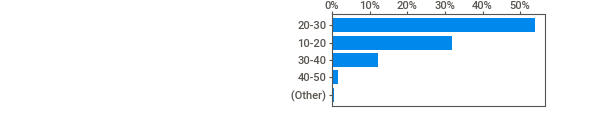
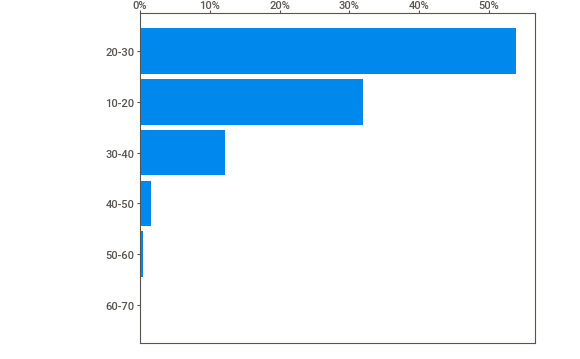
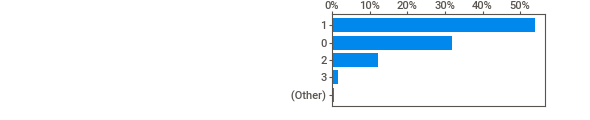
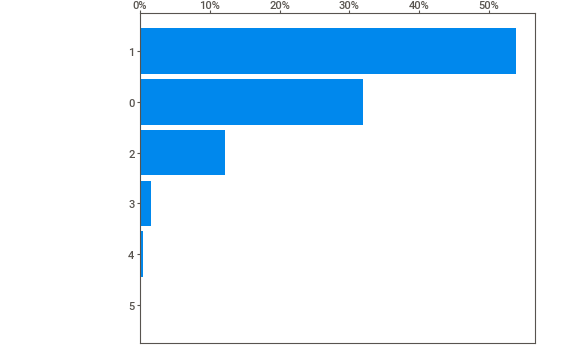
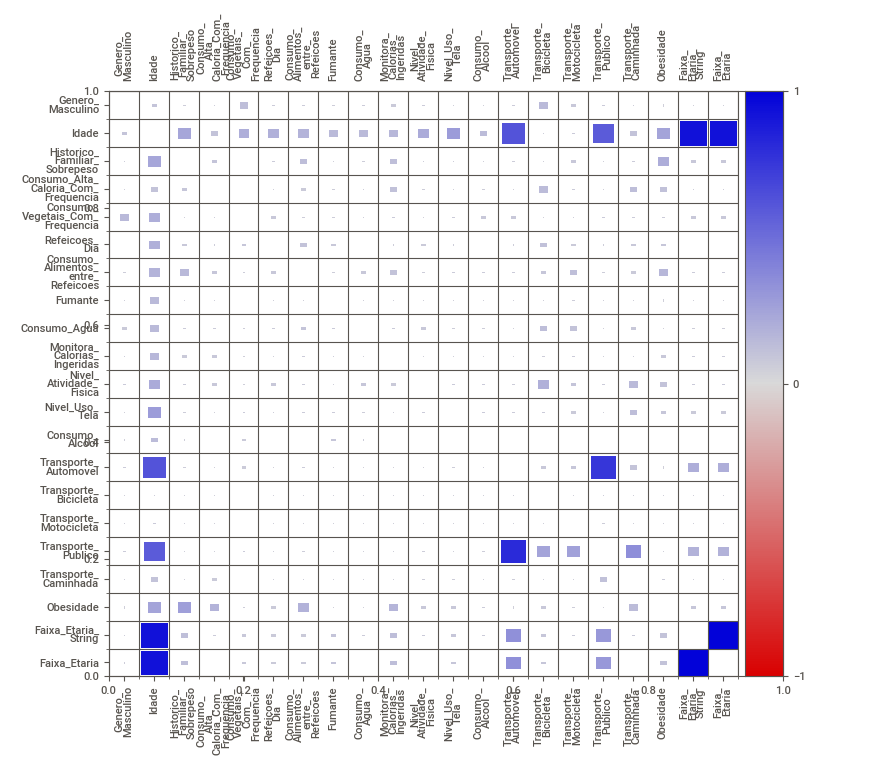
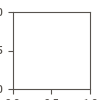

In [171]:
sv_obesidade_report.show_notebook()

### Treinamento do Modelo - Baseline

In [172]:
# Dividir Dados de Treino e Teste
X = df_obesidade.drop(columns=['Idade', 'Faixa_Etaria_String', 'Obesidade'])
y = df_obesidade['Obesidade']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=51, shuffle=True)

In [173]:
# Treinamento do Modelo
model_baseline = GaussianNB()
model_baseline.fit(X_train, y_train)


GaussianNB()

### Métricas Modelo Baseline

In [174]:
# Predizer valores do conjunto de teste
y_pred = model_baseline.predict(X_test)

In [175]:
# Avaliando desempenho do modelo
classification_report_str = classification_report(y_test, y_pred)
recall_baseline = recall_score(y_test, y_pred, average='macro')
print(f'Relatorio de Classificação:\n{classification_report_str}')
print(f'Recall Baseline: {recall_baseline}')

Relatorio de Classificação:
              precision    recall  f1-score   support

           0       0.94      0.60      0.73       339
           1       0.67      0.96      0.79       295

    accuracy                           0.76       634
   macro avg       0.81      0.78      0.76       634
weighted avg       0.82      0.76      0.76       634

Recall Baseline: 0.775901204939753


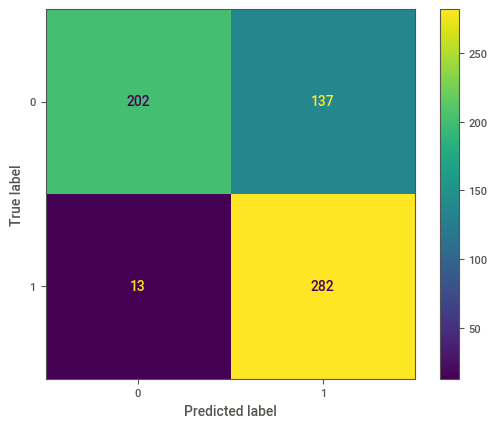

In [176]:
# Mostrar matriz de confusão
confusion_matrix_modelo_baseline = confusion_matrix(y_test, y_pred)
disp_modelo_baseline = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_modelo_baseline)
disp_modelo_baseline.plot()

### Treinamento MOdelo - Automated Feature Selection

In [177]:
# Select KBest - Seleciona as K melhores features, baseado em testes
kbest = SelectKBest(score_func=chi2, k=5)
X_train_kbest = kbest.fit_transform(X_train, y_train)

In [178]:
X_train_kbest

array([[0, 0, 2, 1, 0],
       [1, 0, 2, 1, 2],
       [1, 0, 0, 0, 0],
       ...,
       [1, 0, 0, 0, 2],
       [1, 0, 3, 1, 1],
       [1, 0, 1, 0, 1]])

In [179]:
kbest_features = kbest.get_support(indices=True)
kbest_features

array([ 1,  8,  9, 10, 17])

In [180]:
X_train_best_feature = X_train.iloc[:, kbest_features]
X_train_best_feature.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1477 entries, 301 to 2105
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   Historico_Familiar_Sobrepeso  1477 non-null   int64   
 1   Monitora_Calorias_Ingeridas   1477 non-null   int64   
 2   Nivel_Atividade_Fisica        1477 non-null   int64   
 3   Nivel_Uso_Tela                1477 non-null   int64   
 4   Faixa_Etaria                  1477 non-null   category
dtypes: category(1), int64(4)
memory usage: 59.4 KB


In [181]:
# Treinar Modelo melhores features
model_kbest = GaussianNB()
model_kbest.fit(X_train_best_feature, y_train)

GaussianNB()

### Métricas Modelo Baseline

In [182]:
# Filtrar as features nos dados de teste
X_test_kbest = kbest.transform(X_test)
X_test_best_feature = X_test.iloc[:, kbest_features]

In [184]:
# Predizer valores do conjunto de teste
y_pred_kbest = model_kbest.predict(X_test_best_feature)

In [187]:
# Avaliando desempenho do modelo
classification_report_str = classification_report(y_test, y_pred_kbest)
recall_baseline = recall_score(y_test, y_pred_kbest, average='macro')
print(f'Relatorio de Classificação (kBest):\n{classification_report_str}')
print(f'Recall Baseline (kBest): {recall_baseline}')

Relatorio de Classificação (kBest):
              precision    recall  f1-score   support

           0       0.92      0.43      0.59       339
           1       0.59      0.96      0.73       295

    accuracy                           0.68       634
   macro avg       0.76      0.70      0.66       634
weighted avg       0.77      0.68      0.66       634

Recall Baseline (kBest): 0.6950002499875007


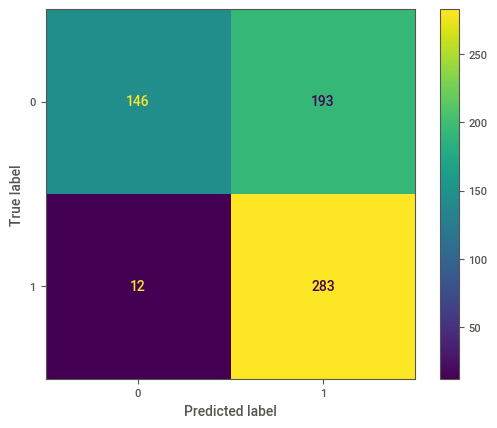

In [188]:
# Mostrar matriz de confusão
confusion_matrix_modelo_baseline = confusion_matrix(y_test, y_pred_kbest)
disp_modelo_baseline = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_modelo_baseline)
disp_modelo_baseline.plot()

### Tuning de Hiperparâmetros com Optuna

In [ ]:
# Ajustar hiperparâmetros do SelectKBest
# k = k melhores features conforme chi2
def naive_bayes_optuna(trial):
    # Definir o número de features a serem selecionadas
    k = trial.suggest_int('k', 1, 18)
    
    X_train_kbest = kbest.fit_transform(X_train, y_train)

    kbest_features = kbest.get_support(indices=True)
    X_train_best_feature = X_train.iloc[:, kbest_features]

    # Treinar o modelo com as melhores features
    model_kbest_optuna = GaussianNB()
    model_kbest_optuna.fit(X_train_best_feature, y_train)

    # Aplicar o seletor de features no conjunto de teste
    X_test_kbest = kbest.transform(X_test)
    X_test_best_features = X_test.iloc[:, kbest_features]
    
    # Predizer valores do conjunto de teste
    y_pred_kbest = model_kbest_optuna.predict(X_test_best_features)

    # Avaliar recall
    recall_optuna = recall_score(y_test, y_pred_kbest, average='macro')
    return k, recall_optuna

In [190]:
# Rodar o estudo dos hiperparâmetros
search_space = {
    'k': list(range(1, 19))
}
estudo_naive_bayes = optuna.create_study(sampler=optuna.samplers.GridSampler(search_space=search_space), directions=['minimize', 'maximize'])
estudo_naive_bayes.optimize(naive_bayes_optuna, n_trials=50)


[I 2025-04-26 20:46:05,011] A new study created in memory with name: no-name-5c6a0469-6b60-4e6a-b563-f138b44c4f7c
[W 2025-04-26 20:46:05,144] Trial 0 failed with parameters: {'k': 6} because of the following error: The number of the values 1 did not match the number of the objectives 2.
[W 2025-04-26 20:46:05,146] Trial 0 failed with value 0.6950002499875007.
[W 2025-04-26 20:46:05,164] Trial 1 failed with parameters: {'k': 15} because of the following error: The number of the values 1 did not match the number of the objectives 2.
[W 2025-04-26 20:46:05,165] Trial 1 failed with value 0.6950002499875007.
[W 2025-04-26 20:46:05,181] Trial 2 failed with parameters: {'k': 16} because of the following error: The number of the values 1 did not match the number of the objectives 2.
[W 2025-04-26 20:46:05,182] Trial 2 failed with value 0.6950002499875007.
[W 2025-04-26 20:46:05,196] Trial 3 failed with parameters: {'k': 17} because of the following error: The number of the values 1 did not mat